# 1. Data Collection

## 1) NYC Inspection Result Dataset

### Import library

In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

%matplotlib inline

### Restaurant Inspection Result dataset (column description)

* `CAMIS` : unique identififer for the establishment(restaurant)
> - 10-digit integer, unique CAMIS for each establishments
* `DBA` : establishment(restaurant) name
> - DBA = Doing Business As
* `BORO` : borough of establishment(restaurant) location
> - Manhattan(New York) 
> - Bronx
> - Brooklyn
> - Queens
> - Staten Island
> - Missing
* `BUILDING` : building number for establishment(restaurant) location
* `STREET` : street name for establishment(restaurant) location
* `ZIPCODE` : zip code of establishment(restaurant) location
* `PHONE` : phone number
* `CUISINE DESCRIPTION` : establishment(restaurant) cuisine
* `INSPECTION DATE` : date of inspection
> - Inspection dates of 1/1/1900 mean the new establishments have not yet had an inspection
* `ACTION` : action associated with each establishment(restaurant) inspection
> - Missing = not yet inspected
* `VIOLATION CODE` : violation code associated with an establishment(restaurant) inspection
> - 02~10, 99 = scored category
> - 15~22 = unscored category
* `VIOLATION DESCRIPTION` : violation description associated with an establishment(restaurant) inspection
* `CRITICAL FLAG` : indicator of critical violation
> - Critical / Not Critical / Not Applicable
* `SCORE` : total score for a paricular inspection
> - A = 0 ~ 13 
> - B = 14 ~ 27 
> - C = 28+
* `GRADE` : grade associated with the inspection
> - A = Grade A
> - B = Grade B
> - C = Grade C
> - Z = Grade Pending
> - P = Grade Pending issued on re-opening following an initial inspection that resulted in a closure
* `GRADE DATE` : date when grade was issued to the establishment(restaurant)
* `RECORD DATE` : date record was added to dataset
* `INSPECTION TYPE` : a combination of the inspection program and the type of inspection performed

### Import data

In [2]:
df = pd.read_csv('../../DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50000598,UNCLE TED'S,MANHATTAN,163,BLEECKER STREET,10012.0,2127771395,Chinese,10/03/2016,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,46.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
1,50000786,DUNKIN' DONUTS,BROOKLYN,873,FLATBUSH AVENUE,11226.0,7189400080,Donuts,12/14/2017,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,10.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
2,41703747,M2N BUFFET,QUEENS,4012,82 STREET,11373.0,7188032488,American,01/27/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,21.0,NaN,NaN,02/06/2019,Cycle Inspection / Initial Inspection
3,40394258,TOMMASO RESTAURANT,BROOKLYN,1464,86 STREET,11228.0,7182369883,Italian,10/24/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,27.0,B,10/24/2017,02/06/2019,Cycle Inspection / Re-inspection
4,50059515,STICKY'S FINGER JOINT,MANHATTAN,21,MAIDEN LN,10038.0,9177551770,Chicken,03/08/2018,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,5.0,A,03/08/2018,02/06/2019,Cycle Inspection / Initial Inspection


In [3]:
# Check data types
df.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

### `RECORD DATE` is all identical. Let's drop it.

In [4]:
df.drop('RECORD DATE', axis=1, inplace=True)

### Change `DATES` data type to `datetime`

In [5]:
for col in ['INSPECTION DATE', 'GRADE DATE']:
    df[col] = pd.to_datetime(df[col])
df.dtypes

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
INSPECTION TYPE                  object
dtype: object

### Clean text data by revmoing space and making it lower case to make it easier to manipulate data.

- #### Columns

In [6]:
df.columns = [str(i).lower().replace(" ","_") for i in df.columns]

- #### features

In [7]:
# Turn all text to lower case
df['dba'] = [str(i).lower() for i in df['dba']]
df['boro'] = [i.lower() for i in df['boro']]
df['building'] = [str(i) for i in df['building']]
df['street'] = df.apply(lambda row: str(row.street).lower(), axis=1)

### Convert datatype of `phone` and `zipcode` to integer

- #### zipcode

In [8]:
# Fill null value in `phone` column with 0 first, 
# and then change to integer
df['zipcode'].fillna(00000, inplace=True)
df['zipcode'] = [int(i) for i in df['zipcode']]

- #### phone

In [9]:
# Remove "-" or space in phone
df['phone'] = [str(i).replace("_", "") for i in df['phone']]
df['phone'] = [str(i).replace(" ", "") for i in df['phone']]

# Remove any row without 10 digit phone number.
df['phone'] = df.apply(lambda x: int(x.phone) if len(str(x.phone))==10 else 0 ,axis=1)
df = df[df['phone'] != 0]

### Sort values by `CAMIS`, `INSPECTION DATE`, and `VIOLATION CODE`.

In [10]:
df.sort_values(by=["camis", "inspection_date", 'violation_code'], inplace=True)

### Let's get unique inspection result by `CAMIS` and `INSPECTION DATE`.

In [11]:
df_unique = df.drop_duplicates(subset=["camis", "inspection_date"])

#### Check each column with null values

In [12]:
for i in df_unique.columns:
    if df_unique[i].isnull().sum() != 0:
        print(i)
        print(df_unique[i].isnull().sum())
        print("-" * 20)

action
1185
--------------------
violation_code
4232
--------------------
violation_description
4395
--------------------
score
4012
--------------------
grade
49805
--------------------
grade_date
50198
--------------------
inspection_type
1185
--------------------


> DBA with null values have no meaningful data. Let's drop the column.

In [13]:
df_unique['dba'].dropna(inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:3896: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [14]:
df_unique[df_unique['grade'] == "Z"]#['score'].value_counts().sort_index()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,inspection_type
39995,40366497,the punch bowl,bronx,5820,broadway,10463,7188847322,American,2018-06-27,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,22.0,Z,2018-06-27,Cycle Inspection / Re-inspection
323345,40369087,blue bay restaurant,bronx,3533,johnson avenue,10463,7188846476,American,2018-12-20,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,36.0,Z,2018-12-20,Cycle Inspection / Re-inspection
329567,40381210,symposium greek restaurant,manhattan,544,west 113 street,10025,2128651011,Greek,2019-01-07,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,38.0,Z,2019-01-07,Cycle Inspection / Re-inspection
222105,40384222,pj morans,manhattan,3,east 48 street,10017,2127536440,Irish,2019-01-03,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,26.0,Z,2019-01-03,Cycle Inspection / Re-inspection
106742,40385693,salumeria beillese/ biricchino rest,manhattan,378,8 avenue,10001,2127367376,Italian,2018-10-24,Violations were cited in the following area(s).,05F,Insufficient or no refrigerated or hot holding...,Critical,38.0,Z,2018-10-24,Cycle Inspection / Re-inspection
27344,40386147,jacks fire department,queens,3946,skillman avenue,11104,7187849090,American,2018-10-04,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,Z,2018-10-04,Cycle Inspection / Re-inspection
269662,40387243,jimmy max restaurant,staten island,280,watchogue road,10314,7189836715,American,2019-01-14,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,35.0,Z,2019-01-14,Cycle Inspection / Re-inspection
315911,40388784,2a,manhattan,25,avenue a,10009,2125052466,American,2018-10-25,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,20.0,Z,2018-10-25,Cycle Inspection / Re-inspection
361867,40390409,the famous jimbo's hamburger palace,manhattan,1345,amsterdam avenue,10027,2128658777,Hamburgers,2019-01-25,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,22.0,Z,2019-01-25,Cycle Inspection / Re-inspection
371418,40391350,vaccaro's pizzeria & trattoria,queens,8802,little neck parkway,11001,7183474143,Pizza/Italian,2019-01-18,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,10.0,Z,2019-01-18,Cycle Inspection / Reopening Inspection


In [15]:
df_unique.drop('grade', inplace=True, axis=1)
df_unique.drop('grade_date', inplace=True, axis=1)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Drop the rows which `INSPECTION DATE` is `1900-01-01`

> For the `INSPECTION DATE` with `1900-01-01` value has no target value, let's drop those rows.

In [16]:
df_unique = df_unique[df_unique["inspection_date"] != '1900-01-01']

### Drop the rows with null values from our target variable `SCORE` 

In [17]:
df_unique = df_unique.dropna(subset=["score"])


### Fill in missing data in `BORO` columns based on the zip code.

In [18]:
df_unique[df_unique['boro'] == "missing"]["zipcode"].value_counts()

11249    24
10281     6
10168     4
Name: zipcode, dtype: int64

> Both `11249`, `10281`, and `10168` is in `Manhattan`.

In [20]:
df_unique['boro'][df_unique['boro'] == 'missing'] = 'manhattan'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Fill n/a for `VIOLATION CODE` and `VIOLATION DESCRIPTION`

In [21]:
df_unique["violation_code"].fillna("na", inplace=True)
df_unique["violation_description"].fillna("na", inplace=True)

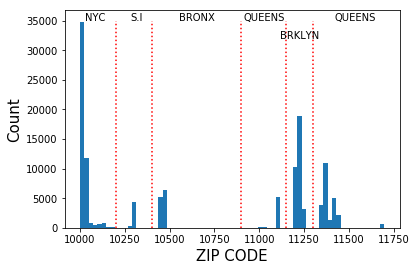

In [22]:
plt.hist(df_unique.zipcode[df_unique.zipcode != 0], bins=70)

plt.vlines(10200, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.vlines(10400, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.vlines(10900, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.vlines(11150, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.vlines(11300, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.text(10030,35000,'NYC')
plt.text(10280,35000,'S.I')
plt.text(10550,35000,'BRONX')
plt.text(10910,35000,'QUEENS')
plt.text(11115,32000,'BRKLYN')
plt.text(11420,35000,'QUEENS')

plt.xlabel('ZIP CODE', size=15)
plt.ylabel('Count', size=15)

plt.savefig('../zipcode_distribution_before')

### Save the cleaned data to csv file

In [23]:
df_unique.to_csv('../dataset/restaurant_inspection_result_cleaned')

## 2) Yelp Dataset

In [24]:
# Import Yelp API library
from yelpapi import YelpAPI

In [25]:
api_key = 'bIfAdQ3BnnDehQTQKGxtiYV-LeqtS2TOd5QB9Q3DHFv8nyzm_SvQSjn57zR26jn7JniqH6Gaqae3aKdOpFRwngU-_Q9Z6N5qm25OuYyA5k-LWAooYmz9IQsy3A5SXHYx'
yelp_api = YelpAPI(api_key)

In [26]:
df_zipcode = pd.read_csv('../dataset/New_York_State_ZIP_Codes-County_FIPS_Cross-Reference.csv')
df_zipcode.head()

,County Name,State FIPS,County Code,County FIPS,ZIP Code,File Date
0,Albany,36,1,36001,12007,07/25/2007
1,Albany,36,1,36001,12009,07/25/2007
2,Albany,36,1,36001,12023,07/25/2007
3,Albany,36,1,36001,12041,07/25/2007
4,Albany,36,1,36001,12045,07/25/2007


#### County codes of NYC are followings

- New York = 61
- Queens = 81
- Brooklyn = 47
- Bronx = 5
- Staten Island = 85

In [27]:
zip_codes = df_zipcode[df_zipcode['County Code'].isin([61, 81, 47, 5, 85])]['ZIP Code']

In [28]:
def search_query(zip_codes):
    df = pd.DataFrame(columns=['name', 'address', 'zip_code', 'rating', 'price', 'cuisine', 'phone'])

    for zip_code in zip_codes:
        count = 1
        if count != 0:
            response = yelp_api.search_query(location=str(zip_code), sort_by='distance', limit=50, offset=count)['businesses']
            count = 0
            for i in range(len(response)):
                if response[i]['location']['zip_code'] == str(zip_code):
                    count += 1
                    try:
                        df = df.append({'name': response[i]['name'],
                                       'address': response[i]['location']['address1'],
                                       'zip_code': response[i]['location']['zip_code'],
                                       'rating': response[i]['rating'],
                                       'price': response[i]['price'],
                                       'cuisine': response[i]['categories'][0]['alias'],
                                       'phone': response[i]['phone']}, ignore_index=True)
                    except:
                        pass

    return df

In [29]:
df_nyc = search_query(zip_codes)
df_nyc

,name,address,zip_code,rating,price,cuisine,phone
0,Sabores Restaurant,582 Morris Ave,10451,2.0,$$,latin,+17184011653
1,Bickles 2 Go,647 Courtlandt Ave,10451,4.5,$,caribbean,+13479634184
2,Carvel,560 Morris Ave,10451,3.5,$$,icecream,+17184022300
3,La Perla Mexicana,281 E 149th St,10451,4.0,$,mexican,+17185856425
4,Franco's,295 E 149th St,10451,4.5,$,juicebars,+13475771466
5,La Perla Mexicana,281 E 149th St,10451,4.0,$$,mexican,+17185851309
6,McDonald's,279 E 149th St,10451,2.0,$,hotdogs,+17182928812
7,Merry Land Chinese Restaurant,325 E 149th St,10451,2.5,$,chinese,+17189933608
8,Dunkin' Donuts,274 E 149th St,10451,1.5,$,donuts,+17182921478
9,Yolanda Italian Restaurant & Pizzeria,292 E 149th St,10451,3.5,$$,pizza,+17189932709


In [31]:
df_nyc.zip_code = df_nyc.zip_code.astype(int)

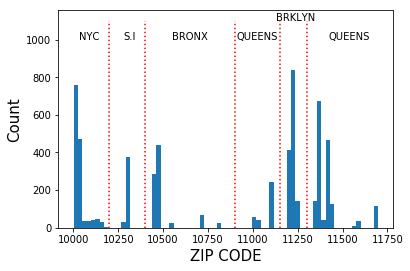

In [32]:
plt.hist(df_nyc.zip_code, bins=70);
plt.vlines(10200, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.vlines(10400, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.vlines(10900, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.vlines(11150, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.vlines(11300, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.text(10030,1000,'NYC')
plt.text(10280,1000,'S.I')
plt.text(10550,1000,'BRONX')
plt.text(10910,1000,'QUEENS')
plt.text(11130,1100,'BRKLYN')
plt.text(11420,1000,'QUEENS')

plt.xlabel('ZIP CODE', size=15)
plt.ylabel('Count', size=15)

plt.savefig('../zipcode_distribution_after')

In [33]:
df_nyc.to_csv('../dataset/yelp_nyc')